<a href="https://colab.research.google.com/github/vivaming/PyPractice/blob/master/DL_With_Python_CH03_Multi_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import reuters

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Explore the datasets

In [3]:
len(train_data), len(test_data), train_data.shape, test_data.shape, type(train_data)

(8982, 2246, (8982,), (2246,), numpy.ndarray)

In [4]:
train_data[2][1:10]

[53, 12, 284, 15, 14, 272, 26, 53, 959]

In [5]:
word_index=reuters.get_word_index()


In [6]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) 
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [7]:
train_labels[2]

3

In [8]:
import numpy as np

In [9]:
def vectorize_sequences(sequences, dimension=10000):
            results = np.zeros((len(sequences), dimension))
            for i, sequence in enumerate(sequences):
              results[i, sequence] = 1.
            return results

In [10]:
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [11]:
x_train.shape

(8982, 10000)

In [12]:
def to_one_hot(labels, dimension=46):
    results=np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results 

In [13]:
one_hot_train_labels=to_one_hot(train_labels)
one_hot_test_labels=to_one_hot(test_labels)

Alternatively, we can use the built-in function from keras

In [14]:

# from keras.utils.np_utils import to_categorical
# one_hot_train_labels = to_categorical(train_labels)
# ne_hot_test_labels = to_categorical(test_labels)

In [15]:
one_hot_train_labels.shape

(8982, 46)

In [16]:
from keras import models
from keras import layers

In [17]:

model=models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))



In [18]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy']
)

In [19]:
x_val=x_train[:1000]
partial_x_train=x_train[1000:]

y_val=one_hot_train_labels[:1000]
partial_y_train=one_hot_train_labels[1000:]

In [20]:
history=model.fit(partial_x_train, partial_y_train,
                  epochs=20,
                  batch_size=100,
                  validation_data=(x_val, y_val))

Epoch 1/20
80/80 [==============================] - 2s 21ms/step - loss: 1.7542 - accuracy: 0.6387 - val_loss: 1.1880 - val_accuracy: 0.7210
Epoch 2/20
80/80 [==============================] - 1s 17ms/step - loss: 0.9108 - accuracy: 0.8013 - val_loss: 0.9628 - val_accuracy: 0.7980
Epoch 3/20
80/80 [==============================] - 1s 18ms/step - loss: 0.5982 - accuracy: 0.8746 - val_loss: 0.8783 - val_accuracy: 0.8300
Epoch 4/20
80/80 [==============================] - 2s 21ms/step - loss: 0.4081 - accuracy: 0.9128 - val_loss: 0.8480 - val_accuracy: 0.8280
Epoch 5/20
80/80 [==============================] - 1s 18ms/step - loss: 0.2946 - accuracy: 0.9339 - val_loss: 0.8850 - val_accuracy: 0.8170
Epoch 6/20
80/80 [==============================] - 1s 16ms/step - loss: 0.2329 - accuracy: 0.9441 - val_loss: 0.9010 - val_accuracy: 0.8210
Epoch 7/20
80/80 [==============================] - 1s 12ms/step - loss: 0.1985 - accuracy: 0.9506 - val_loss: 0.9464 - val_accuracy: 0.8110
Epoch 8/20
80

In [21]:
import matplotlib.pyplot as plt

In [28]:
train_loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1, len(train_loss)+1)

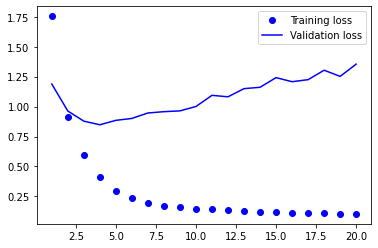

In [33]:
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()
plt.show()

In [34]:
predictions = model.predict(x_test)

Accuracy ratio

In [45]:
sum(np.argmax(predictions, axis=1)==test_labels)/len(test_labels)

0.7733748886910062